# 1. Getting the basics ready

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Displaying settings
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 120)

plt.rcParams["figure.figsize"] = (10, 6)
sns.set_theme(style="whitegrid")
%matplotlib inline

print("Pandas version:", pd.__version__)


Pandas version: 2.2.2


# 2. Loading dataset and first inspection

In [2]:
#saved as UTF-8 CSV with semicolon delimiter

FILE_PATH = "/Users/pinargokhan/Desktop/Pusula_Pinar_Gokhan/data/Talent_Academy_Case_DT_2025.csv"

df = pd.read_csv(FILE_PATH, sep=";", encoding="utf-8-sig", low_memory=False)
print("Data shape:", df.shape)
display(df.head())

Data shape: (2235, 13)


,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,20 Dakika
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,5 Dakika
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika


# 3. Normalizing column names to handle Turkish chars

In [3]:
df.columns = (
    df.columns
      .str.strip()
      .str.replace(r"\s+", "_", regex=True)
      .str.replace("İ", "I")
      .str.replace("ı", "i")
)

print("Columns:", list(df.columns))

Columns: ['HastaNo', 'Yas', 'Cinsiyet', 'KanGrubu', 'Uyruk', 'KronikHastalik', 'Bolum', 'Alerji', 'Tanilar', 'TedaviAdi', 'TedaviSuresi', 'UygulamaYerleri', 'UygulamaSuresi']


# 4. Expected columns validation

In [4]:
expected = [
    "HastaNo","Yas","Cinsiyet","KanGrubu","Uyruk","KronikHastalik",
    
    "Bolum","Alerji","Tanilar","TedaviAdi","TedaviSuresi",
    
    "UygulamaYerleri","UygulamaSuresi"
]

missing = [c for c in expected if c not in df.columns]
extra   = [c for c in df.columns if c not in expected]

print("Missing expected columns:", missing)
print("Unexpected extra columns:", extra)



Missing expected columns: []
Unexpected extra columns: []


# 5. Preview first and last rows with summary info

In [5]:
display(df.head(3))
display(df.tail(3))

print("\n--- INFO ---")
df.info()

print("\n--- NUMERIC SUMMARY ---")
num_cols = df.select_dtypes(include=[np.number]).columns
display(df[num_cols].describe())




,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,20 Dakika
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika


,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
2232,145537,33,Kadın,A Rh+,Türkiye,NaN,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Sucuk,"Aşil tendon yaralanması,​Algonörodistrofi,​ ay...",Aşil Rüptürü Rehabilitasyonu,15 Seans,Sol Ayak Bileği Bölgesi,20 Dakika
2233,145537,33,Kadın,A Rh+,Türkiye,NaN,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Sucuk,"Aşil tendon yaralanması,Algonörodistrofi, ayak...",Aşil Rüptürü Rehabilitasyonu,15 Seans,Sol Ayak Bileği Bölgesi,15 Dakika
2234,145537,33,Kadın,A Rh+,Türkiye,NaN,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Sucuk,"Aşil tendon yaralanması,Algonörodistrofi, ayak...",Aşil Rüptürü Rehabilitasyonu,15 Seans,Sol Ayak Bileği Bölgesi,5 Dakika



--- INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HastaNo          2235 non-null   int64 
 1   Yas              2235 non-null   int64 
 2   Cinsiyet         2066 non-null   object
 3   KanGrubu         1560 non-null   object
 4   Uyruk            2235 non-null   object
 5   KronikHastalik   1624 non-null   object
 6   Bolum            2224 non-null   object
 7   Alerji           1291 non-null   object
 8   Tanilar          2160 non-null   object
 9   TedaviAdi        2235 non-null   object
 10  TedaviSuresi     2235 non-null   object
 11  UygulamaYerleri  2014 non-null   object
 12  UygulamaSuresi   2235 non-null   object
dtypes: int64(2), object(11)
memory usage: 227.1+ KB

--- NUMERIC SUMMARY ---


,HastaNo,Yas
count,2235.000000,2235.000000
mean,145333.100224,47.327069
std,115.214248,15.208634
min,145134.000000,2.000000
25%,145235.000000,38.000000
50%,145331.000000,46.000000
75%,145432.000000,56.000000
max,145537.000000,92.000000


# 6. Checking missing values

,Missing_Count,Missing_Percent
Alerji,944,42.24
KanGrubu,675,30.20
KronikHastalik,611,27.34
UygulamaYerleri,221,9.89
Cinsiyet,169,7.56
Tanilar,75,3.36
Bolum,11,0.49
HastaNo,0,0.00
Yas,0,0.00
Uyruk,0,0.00


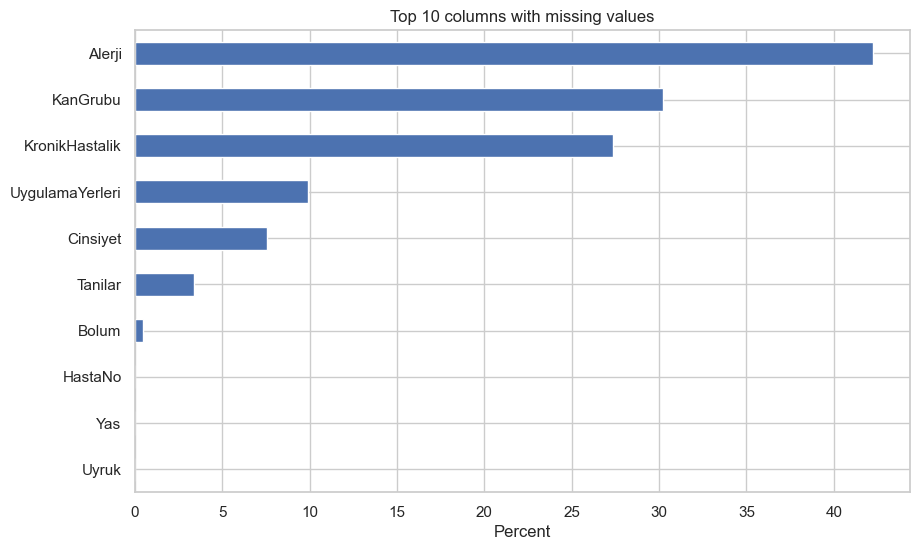

Number of full row duplicates 928


In [6]:
na_table = pd.DataFrame({
    "Missing_Count": df.isna().sum(),
    "Missing_Percent": (df.isna().mean()*100).round(2)
}).sort_values("Missing_Percent", ascending=False)

display(na_table.head(10))

# Visualizing the top 10 missing columns

ax = na_table["Missing_Percent"].head(10).plot(kind="barh", title="Top 10 columns with missing values")
ax.set_xlabel("Percent")
plt.gca().invert_yaxis()
plt.show()

# Checking duplicate rows

print("Number of full row duplicates", df.duplicated().sum())



# 7. Target column exploration

Target variable: TedaviSuresi


count         2235
unique          23
top       15 Seans
freq          1670
Name: TedaviSuresi, dtype: object

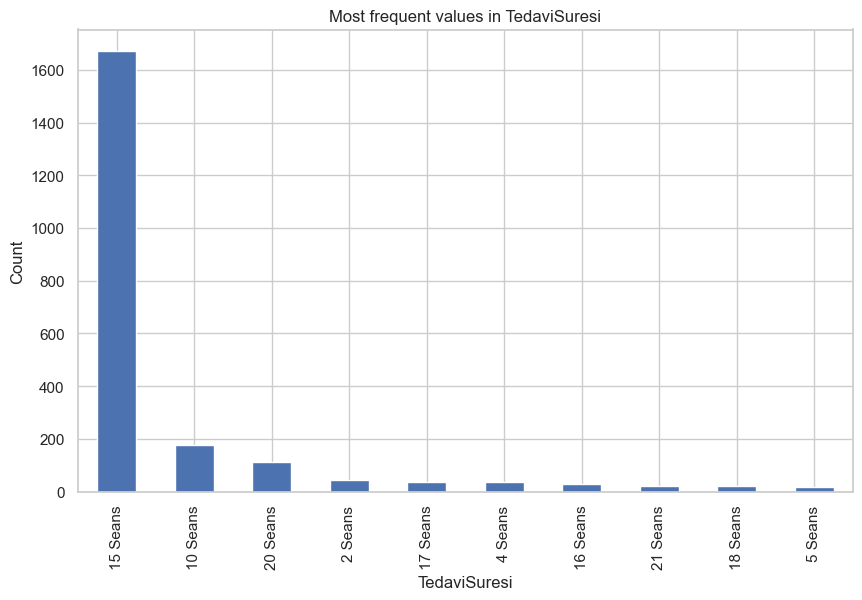

In [7]:
target = "TedaviSuresi"

if target in df.columns:
    print("Target variable:", target)
    display(df[target].describe(include="all"))

    #the most common raw values
    
    df[target].dropna().astype(str).value_counts().head(10).plot(kind="bar")
    plt.title("Most frequent values in TedaviSuresi")
    plt.ylabel("Count")
    plt.show()
else:
    print(f"Column {target} not found")




# 8. Analyzing key categorical columns


Top values for Cinsiyet


Cinsiyet
Kadın    1274
Erkek     792
NaN       169
Name: count, dtype: int64

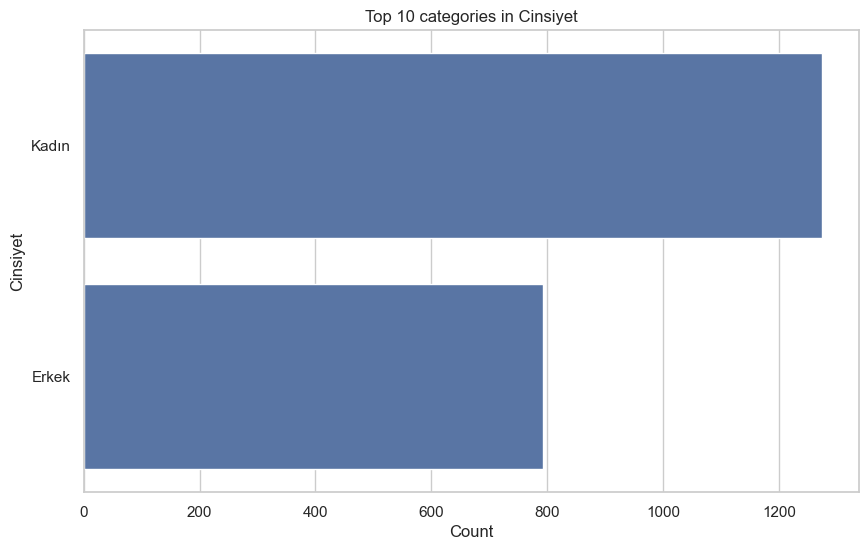


Top values for KanGrubu


KanGrubu
NaN       675
0 Rh+     579
A Rh+     540
B Rh+     206
AB Rh+     80
B Rh-      68
A Rh-      53
0 Rh-      26
AB Rh-      8
Name: count, dtype: int64

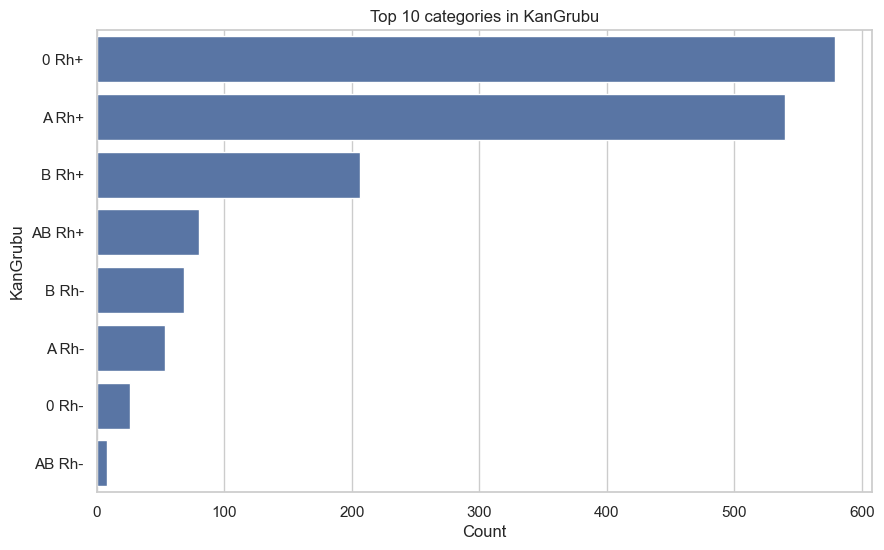


Top values for Uyruk


Uyruk
Türkiye       2173
Tokelau         27
Arnavutluk      13
Azerbaycan      12
Libya           10
Name: count, dtype: int64

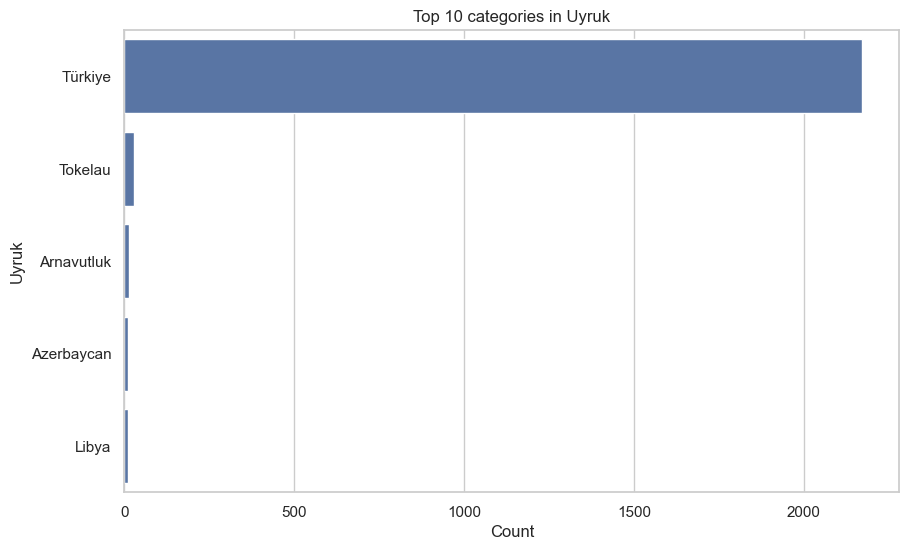


Top values for Bolum


Bolum
Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    2045
Ortopedi Ve Travmatoloji                            88
İç Hastalıkları                                     32
Nöroloji                                            17
Kardiyoloji                                         11
NaN                                                 11
Göğüs Hastalıkları                                   8
Laboratuar                                           7
Genel Cerrahi                                        6
Tıbbi Onkoloji                                       6
Name: count, dtype: int64

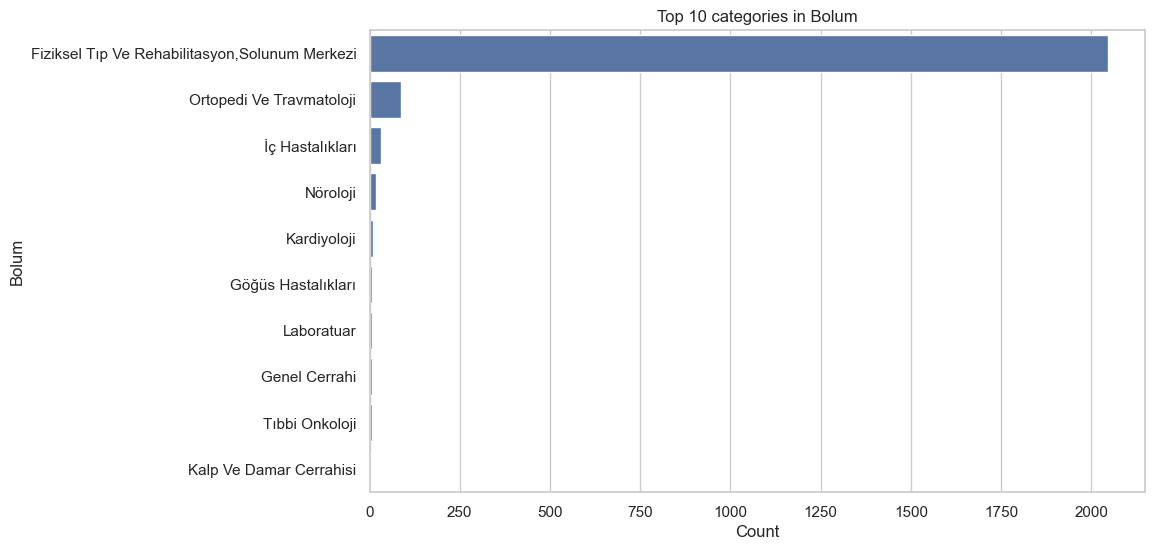


Top values for TedaviAdi


TedaviAdi
Dorsalji -Boyun+trapez             231
İV DİSK BOZUKLUĞU-BEL              200
Dorsalji 1                         140
Dorsalji-Bel                       120
Gonartroz-Meniskopati               95
SAĞ OMUZ İMPİNGEMENT                70
Boyun-Trapezz                       60
Dorsalji-Dorsal                     56
Sol omuz İmpingement                50
Alt ekstremite atrofi-Bilateral     37
Name: count, dtype: int64

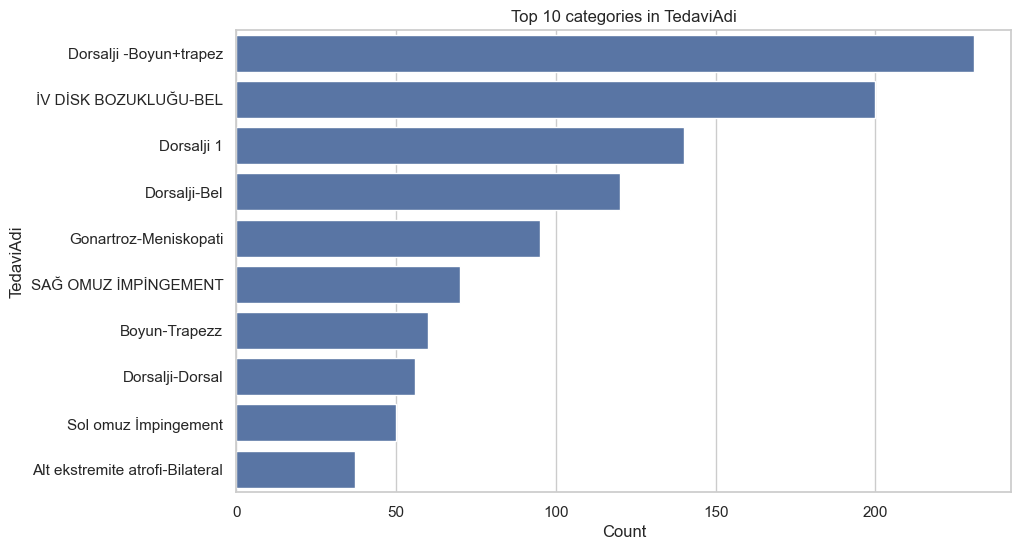

In [8]:
cat_cols = ["Cinsiyet", "KanGrubu", "Uyruk", "Bolum", "TedaviAdi"]

for col in cat_cols:
    if col in df.columns:
        print(f"\nTop values for {col}")
        display(df[col].value_counts(dropna=False).head(10))
        sns.countplot(y=col, data=df, order=df[col].value_counts().head(10).index)
        plt.title(f"Top 10 categories in {col}")
        plt.xlabel("Count")
        plt.ylabel(col)
        plt.show()



# 9. Correlation heatmap for numeric variables

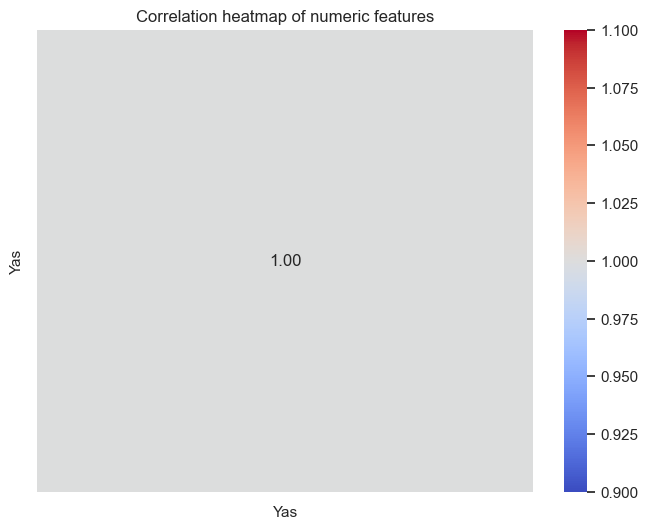

In [9]:
# Focusing only on numeric columns (skip ID like HastaNo)
num_cols = [c for c in df.select_dtypes(include=[np.number]).columns if c != "HastaNo"]

plt.figure(figsize=(8,6))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation heatmap of numeric features")
plt.show()



# 10. Relationship between age and treatment duration

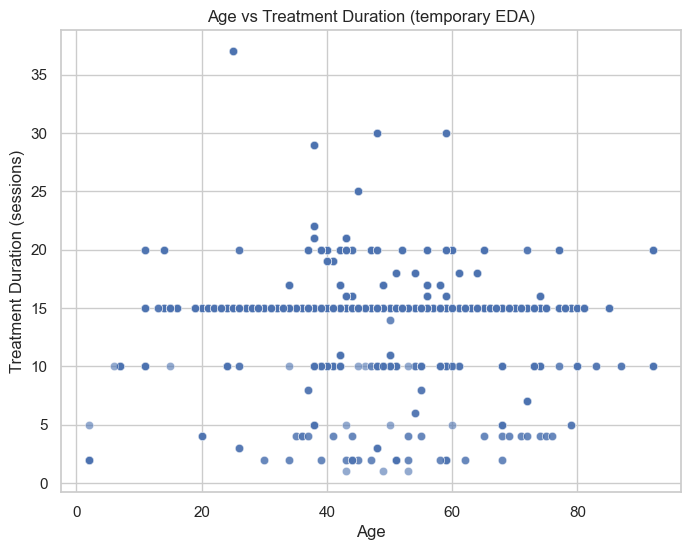

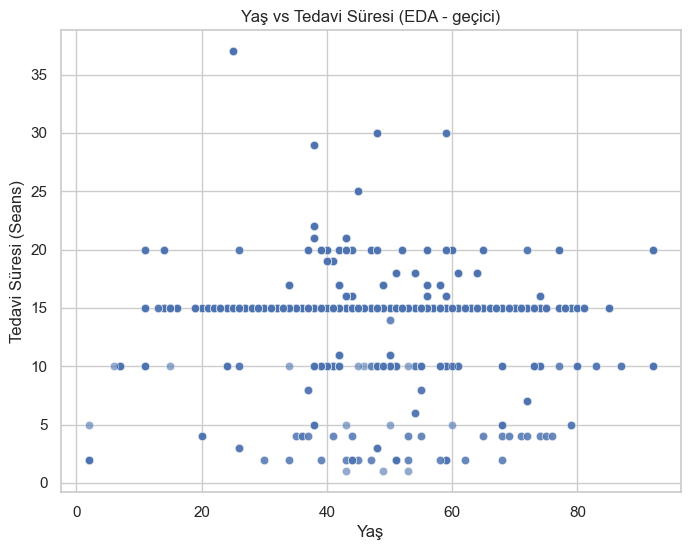

In [10]:
# Quick numeric extraction from TedaviSuresi

import re

def extract_num(s):
    if pd.isna(s):
        return np.nan
    m = re.search(r"\d+", str(s))
    return int(m.group(0)) if m else np.nan

df["TedaviSuresi_num_temp"] = df["TedaviSuresi"].apply(extract_num)

plt.figure(figsize=(8,6))
sns.scatterplot(x="Yas", y="TedaviSuresi_num_temp", data=df, alpha=0.6)
plt.title("Age vs Treatment Duration (temporary EDA)")
plt.xlabel("Age")
plt.ylabel("Treatment Duration (sessions)")
plt.show()

import re

def extract_num(s):
    if pd.isna(s):
        return np.nan
    m = re.search(r"\d+", str(s))
    return int(m.group(0)) if m else np.nan

df["TedaviSuresi_num_temp"] = df["TedaviSuresi"].apply(extract_num)

plt.figure(figsize=(8,6))
sns.scatterplot(x="Yas", y="TedaviSuresi_num_temp", data=df, alpha=0.6)
plt.title("Yaş vs Tedavi Süresi (EDA - geçici)")
plt.xlabel("Yaş")
plt.ylabel("Tedavi Süresi (Seans)")
plt.show()


# 11. Treatment duration across departments

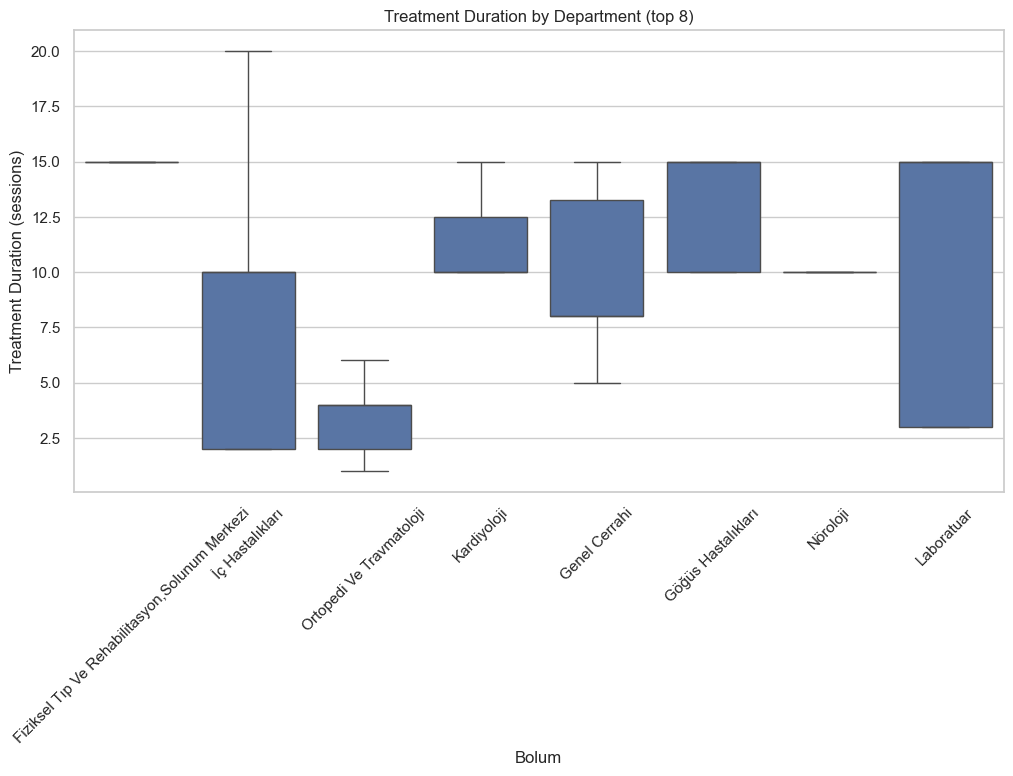

In [11]:
# Boxplotting of treatment duration by top departments

plt.figure(figsize=(12,6))

top_bolum = df["Bolum"].value_counts().head(8).index
sns.boxplot(x="Bolum", y="TedaviSuresi_num_temp", 
            
            data=df[df["Bolum"].isin(top_bolum)],
            showfliers=False)

plt.title("Treatment Duration by Department (top 8)")
plt.xticks(rotation=45)
plt.ylabel("Treatment Duration (sessions)")
plt.show()

